
# Lab 10

Suppose you have a list of positions of possible clients of Uber in Lisbon (Passageiros.csv). How many cars could you use and where they could be positioned in order to reduce time? Use a cluster analysis appraoch to support the solution of this problem.

* import the libraries needed
* import dataset from Passageiros.csv file
* Verify imported data
* verify data types and convert into numeric if needed. Use for example, df['x']=pd.to_numeric(df['x'], errors='coerce')
* plot a scatter chart
* create a X dataframe including only numeric columns
* calculete WCSS using X dataframe:

    wcss = []

    for i in range(1, 11):

        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

        kmeans.fit(df)

        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)

    plt.title('Elbow Method')

    plt.xlabel('Number of clusters')

    plt.ylabel('WCSS')

    plt.show()

    plot a scatter chart showing centroids of the clusters estimated



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Passageiros.csv')

In [3]:
df.head()

,X,Y,Name
0,-9.163874,38.711563,Passageiro 1
1,-9.199447,38.703342,Passageiro 2
2,-9.143752,38.729060,Passageiro 3
3,-9.150410,38.755656,Passageiro 4
4,-9.136334,38.758534,Passageiro 5


In [4]:
df.dtypes

X       float64
Y       float64
Name     object
dtype: object

In [5]:
df1=pd.DataFrame(df)

In [9]:
X=pd.DataFrame (df1[['X','Y']])

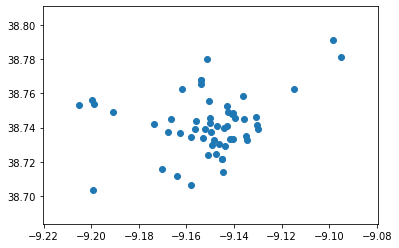

In [10]:
plt.scatter(df1['X'],df1['Y'])

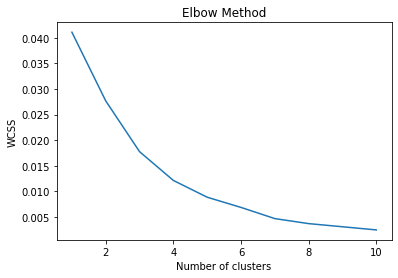

In [11]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

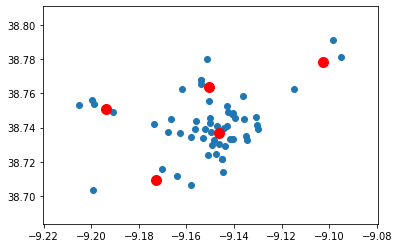

In [12]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
pred_y=kmeans.fit_predict(X)
plt.scatter(df["X"], df["Y"])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="red")